In [21]:
#Importar librerías
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix




In [3]:
#Importar datos
# Se cargan los datos. 

datos_BEN=pd.read_csv('BEN_2020_coding.txt', sep='\t', lineterminator='\r')
datos_BEN_copia = datos_BEN.copy()


datos_BEN_copia.head(5)




,Location,Allele,SYMBOL,Consequence,Protein_position,SIFT,PolyPhen,AF,CADD_PHRED,LoFtool,c,phyloP100way_vertebrate,BLOSUM62
0,\n1:1232800-1232800,C,B3GALT6,missense_variant,174,0.54,0.012,0.1066,14.22,-,2,0.466000,2
1,\n1:2028260-2028260,A,GABRD,missense_variant,220,0.52,0.007,0.0058,22.1,0.0118,0,1.908000,0
2,\n1:3411794-3411794,C,PRDM16,missense_variant,533,1,0,-,14.99,0.101,0,2.031000,-1
3,\n1:3412095-3412095,T,PRDM16,missense_variant,633,0.01,0.015,0.1060,22.2,0.101,0,4.653000,-3
4,\n1:3430888-3430888,A,PRDM16,missense_variant,1101,0.1,0.084,0.0030,15.34,0.101,0,2.224000,1


In [4]:
#Importar datos
# Se cargan los datos. 
datos_PAT=pd.read_csv('PAT_2020_coding.csv')
datos_PAT_copia = datos_PAT.copy()


datos_PAT_copia.head(5)


,Location,Allele,SYMBOL,Consequence,Protein_position,SIFT,PolyPhen,AF,CADD_phred,LoFtool,c,phyloP100way_vertebrate,BLOSUM62
0,1:1535372-1535372,A,TMEM240,missense_variant,170,0,0.012,-,26.8,-,0,6.997,-3
1,1:1804548-1804548,C,GNB1,missense_variant,101,0,0.527,-,23.7,-,0,7.839,1
2,1:1806503-1806503,G,GNB1,missense_variant,80,0,0.998,-,26.8,-,0,9.083,-1
3,1:1806509-1806509,C,GNB1,missense_variant,78,0.07,0.889,-,26.3,-,0,7.815,2
4,1:2228860-2228860,G,SKI,missense_variant,32,0,0.171,-,23.5,-,2,3.114,1


In [6]:
datos_BEN_copia['AF'].replace({'-':None}, inplace = True)
datos_BEN_copia['LoFtool'].replace({'-':None}, inplace = True)




In [12]:
datos_PAT_copia['AF'].replace({'-':None}, inplace = True)
datos_PAT_copia['LoFtool'].replace({'-':None}, inplace = True)


In [13]:
#Limpiar los datos

datos_BEN_copia=datos_BEN_copia.dropna()
datos_BEN_copia=datos_BEN_copia.drop_duplicates()

datos_PAT_copia=datos_PAT_copia.dropna()
datos_PAT_copia=datos_PAT_copia.drop_duplicates()




In [8]:
datos_BEN_copia.describe()

,Location,Allele,SYMBOL,Consequence,Protein_position,SIFT,PolyPhen,AF,CADD_PHRED,LoFtool,c,phyloP100way_vertebrate,BLOSUM62
count,18442,18442,18442,18442,18442,18442,18442,18442,18442,18442,18442,18442,18442
unique,18442,4,2014,4,3573,102,875,2117,6623,1182,4,4741,8
top,\n2:71574306-71574306,A,TTN,synonymous_variant,9,-,-,0.0002,23.3,0.971,-,-,-
freq,1,6374,461,11283,34,11951,11719,1855,79,469,11286,11286,11305


In [14]:
datos_PAT_copia.describe()

,Location,Allele,SYMBOL,Consequence,Protein_position,SIFT,PolyPhen,AF,CADD_phred,LoFtool,c,phyloP100way_vertebrate,BLOSUM62
count,462,462,462,462,462,462,462,462,462,462,462,462,462
unique,462,4,264,4,355,29,128,22,119,248,3,431,8
top,15:42401754-42401754,A,PAH,missense_variant,1,0,-,0.0002,36,0.0107,0,7.905,-
freq,1,192,12,305,5,212,159,315,24,12,335,7,152


In [30]:
datos_BEN_copia.dtypes

Location                   object
Allele                     object
SYMBOL                     object
Consequence                object
Protein_position           object
SIFT                       object
PolyPhen                   object
AF                         object
CADD_PHRED                 object
LoFtool                    object
c                          object
phyloP100way_vertebrate    object
BLOSUM62                   object
dtype: object

In [47]:
datos_BEN_copia["AF"]=datos_BEN_copia["AF"].astype(float) 
datos_BEN_copia["loFtool"]=datos_BEN_copia["LoFtool"].astype(float) 

datos_PAT_copia["AF"]=datos_PAT_copia["AF"].astype(float) 
datos_PAT_copia["loFtool"]=datos_PAT_copia["LoFtool"].astype(float) 


In [41]:
#Naive Bayes para Dataset BEN
seed = 161
### splitting X and y into training and testing sets
X=datos_BEN_copia[["AF","LoFtool"]]

#Variable Objetivo
Y=datos_BEN_copia["Consequence"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=seed)
# training the model on training set

gnbBEN = GaussianNB()
gnb.fit(X_train, Y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 60.76347467736688


In [36]:
#Naive Bayes para dataset PAT
seed = 161
### splitting X and y into training and testing sets
X2=datos_PAT_copia[["AF","LoFtool"]]

#Variable Objetivo
Y2=datos_PAT_copia["Consequence"]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5, random_state=seed)
# training the model on training set

gnbPAT = GaussianNB()
gnb.fit(X2_train, Y2_train)

# making predictions on the testing set
y2_pred = gnb.predict(X2_test)

# comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y2_test, y2_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 77.05627705627705


In [38]:
datos_BEN_copia.dtypes

Location                    object
Allele                      object
SYMBOL                      object
Consequence                 object
Protein_position            object
SIFT                        object
PolyPhen                    object
AF                         float64
CADD_PHRED                  object
LoFtool                     object
c                           object
phyloP100way_vertebrate     object
BLOSUM62                    object
loFtool                    float64
dtype: object

array([[<AxesSubplot:title={'center':'AF'}>]], dtype=object)

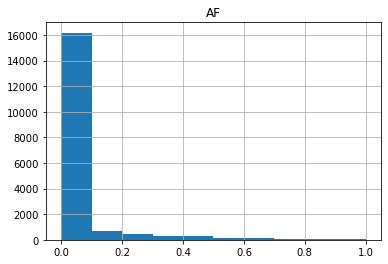

In [44]:
#Gráfica de distribuciones

datos_BEN_copia.hist(column='AF')

array([[<AxesSubplot:title={'center':'AF'}>]], dtype=object)

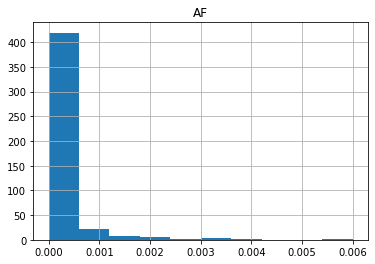

In [45]:
datos_PAT_copia.hist(column='AF')

array([[<AxesSubplot:title={'center':'loFtool'}>]], dtype=object)

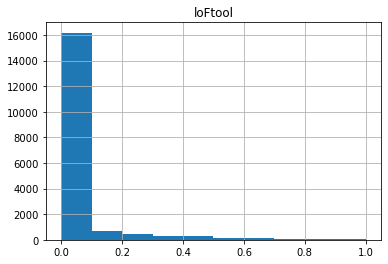

In [46]:
#Gráfica de distribuciones

datos_BEN_copia.hist(column='loFtool')

array([[<AxesSubplot:title={'center':'loFtool'}>]], dtype=object)

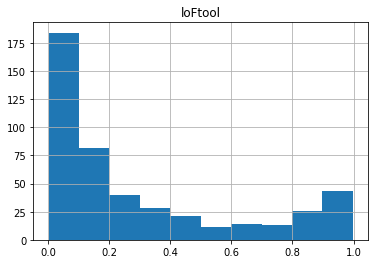

In [48]:
datos_PAT_copia.hist(column='loFtool')

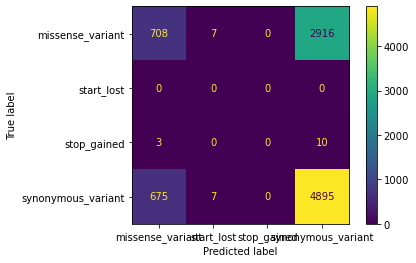

In [49]:
#Matriz de confusión BEN

gnbBEN =gnbBEN.fit(X_train, Y_train)
confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(gnbBEN, X_test, Y_test)  
plt.show()

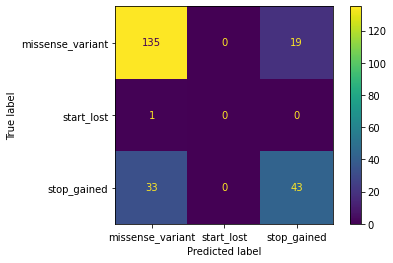

In [50]:
#Matriz de confusión PAT
gnbPAT =gnbPAT.fit(X2_train, Y2_train)
confusion_matrix(Y2_test, y2_pred)

plot_confusion_matrix(gnbPAT, X2_test, Y2_test)  
plt.show()